While I'm waiting for a full parmaeter cube to be generated, I'm testing the emulation framework I've made so far. /

In [15]:
import numpy as np
from src.emulator import build_emulator, train_emulator, emulate, emulate_wrt_r, get_plot_data
from src.allCorrFunc import RBINS
from src.doBatchCalls import BOUNDS, N_PER_DIM

In [16]:
for key, val in BOUNDS.iteritems():
    print key
    print np.linspace(val[0], val[1], num=N_PER_DIM)
    print '*'*30

logMmin
[ 11.7         11.96666667  12.23333333  12.5       ]
******************************
f_c
[ 0.1         0.23333333  0.36666667  0.5       ]
******************************
logM0
[ 10.  11.  12.  13.]
******************************
sigma_logM
[ 0.2         0.36666667  0.53333333  0.7       ]
******************************
logM1
[ 13.1  13.5  13.9  14.3]
******************************
alpha
[ 0.75        0.91666667  1.08333333  1.25      ]
******************************


In [17]:
iv = 'r2xi'
y_param = 'logMmin'
#y_param = 'f_c'
#y_param = 'logM0'
#y_param = 'logM1'
#y_param = 'sigma_logM'
#y_param = 'alpha'

#param_2 = 'logMmin'
param_2 = 'sigma_logM'
#param_2 = 'f_c'
#parma_2 = 'logM0'

#param_3 = 'sigma_logM'
param_3 = 'logM0'
#param_3='f_c'

#param_4 = 'alpha'
param_4 = 'logM1'
#param_4 = 'f_c'

#param_5= 'logM1'
#param_5 = 'f_c'
param_5='alpha'

emulation_point = [('f_c', 0.233), 
                   ('logM0', 12.0), ('sigma_logM', 0.533), ('alpha', 1.083),
                   ('logM1', 13.5), ('logMmin', 12.233)]

fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02, 
                  'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
fixed_params = {key:val for key, val in emulation_point}
#em_params = {}
em_params = {param_2:fixed_params[param_2], param_3:fixed_params[param_3]}#,
            #param_4:fixed_params[param_4], param_5:fixed_params[param_5]} #varying y_param, holding this fixed in the emulator now. 
del fixed_params[y_param]
del fixed_params[param_2]
del fixed_params[param_3]
#del fixed_params[param_4]
#del fixed_params[param_5]

In [18]:
#%%timeit
from time import time
t0 = time()
gp, log_xi, log_xi_cov = build_emulator(fixed_params, independent_vairable)
print np.exp(gp.kernel.vector)
train_emulator(gp, log_xi)
print '%.3f s'%(time()-t0)

64 Points used for training.
Get Data: 18.98
(1152, 4)
Compute Time: 1.33
Initial Params: 
0.481000
0.134900
0.089000
2.000000
0.040000

[ 0.481   0.1349  0.089   2.      0.04  ]
Nll	1008.149293	1.06 s
Grad Nll	387.261979	1.77 s
Nll	1008.149464	1.06 s
Grad Nll	387.261407	1.74 s
Nll	1008.149296	1.07 s
Grad Nll	387.261979	2.64 s
Nll	1107.160641	1.94 s
Grad Nll	117.977901	2.61 s
Nll	1121.729720	1.85 s
Grad Nll	-96.676172	3.02 s
Nll	1121.729721	1.85 s
Grad Nll	-96.676172	2.94 s
Nll	1159.366985	1.85 s
Grad Nll	-99.690953	3.04 s
Nll	1137.777149	1.81 s
Grad Nll	153.296031	2.88 s
Nll	1200.379448	1.81 s
Grad Nll	-73.782956	2.82 s
Nll	1184.363420	1.76 s
Grad Nll	-6.643728	2.01 s
Nll	1195.887023	1.17 s
Grad Nll	-48.058597	1.78 s
Nll	1198.975167	1.12 s
Grad Nll	-62.535070	1.83 s
Nll	1199.883248	1.13 s
Grad Nll	-68.525205	1.82 s
Nll	1200.182271	1.13 s
Grad Nll	-71.241289	1.84 s
Nll	1200.293520	1.14 s
Grad Nll	-72.533402	1.86 s
Nll	1200.339640	1.14 s
Grad Nll	-73.163435	1.84 s
Nll	1200.360332	1.17 s

In [19]:
from scipy.linalg import det, eigh, inv
print log_xi_cov[0,0]
print det(log_xi_cov/log_xi_cov[0,0])

4.70991876529e-06
0.0


In [24]:
from scipy.linalg import eigvals
c = log_xi_cov[:18,:][:,:18]
for e in eigvals(c):
    assert e > 0

In [25]:
gp.recompute()

True

In [26]:
print np.exp(gp.kernel.vector)

[ 0.37816954  0.1036061   0.04903878  2.07914285  0.04453851]


In [27]:
yp = np.linspace(BOUNDS[y_param][0],BOUNDS[y_param][1], num=N_PER_DIM)
N = 200
rpoints = np.linspace(-1, 1.5, N)
RBIN_CENTERS = ((RBINS[:-1]+RBINS[1:])/2)
outputs = emulate_wrt_r(gp, log_xi, em_params, rpoints,
                                    y_param=y_param,y_points=yp)
print len(outputs[0][0])

200


In [28]:
from matplotlib import pyplot as plt
from itertools import cycle
%matplotlib inline
#plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
colors = cycle(sns.color_palette())

In [29]:
plot_r, plot_xi, plot_xi_err = get_plot_data(em_params, fixed_params, bias=bias)

(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)


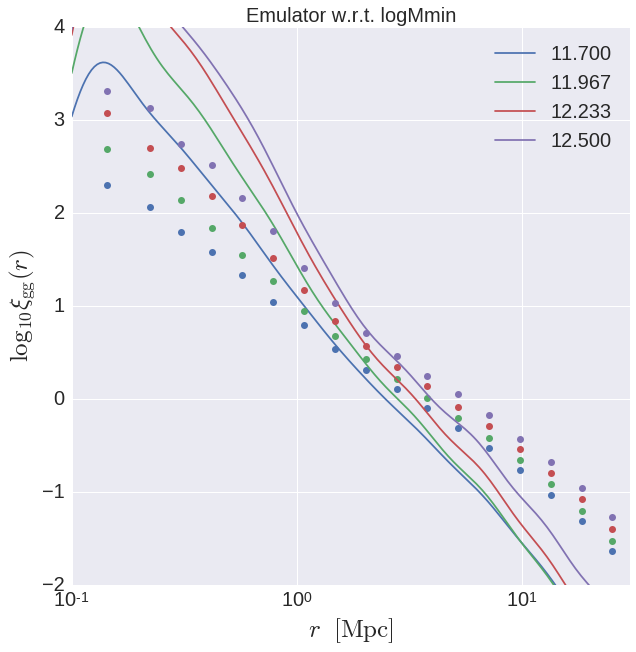

In [30]:
fig = plt.figure(figsize = (10, 10))
for label, (log_xi_pred, log_xi_err),pr, px, err,c in zip(yp, outputs,plot_r, plot_xi,plot_xi_err,colors):

    print rpoints.shape, log_xi_pred.shape
    plt.plot(10**rpoints, (log_xi_pred),label='%.3f'%label,color = c)
    #plt.fill_between(10**rpoints,10**(log_xi_pred+log_xi_mean+log_xi_err),
    #                 10**(log_xi_pred+log_xi_mean-log_xi_err), color = c, alpha = 0.3)
    
    plt.fill_between(10**rpoints,log_xi_pred+log_xi_err,
                     log_xi_pred-log_xi_err, color = c, alpha = 0.3)

    plt.errorbar(10**pr, px,err, color =c,fmt = 'o')

plt.xlim(xmin = 0.1, xmax = 30)    
if bias:
    plt.ylim(ymin = 0, ymax = 15)
else:
    plt.ylim(ymin = -2, ymax = 4)
plt.title("Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
if bias:
    plt.ylabel(r'$\xi_{\rm gg}/\xi_{\rm mm} }$', fontsize=25)
else:
    plt.ylabel(r'$\log_{10}{\xi_{\rm gg}(r) }$', fontsize=25)
plt.legend(loc='best', fontsize=20)  

In [31]:
N = 200
plot_xi = plot_xi.T #switch rows and cols
plot_xi_err = plot_xi_err.T
plot_r = plot_r.T
yp = np.linspace(BOUNDS[y_param][0],BOUNDS[y_param][1], num=N)
plot_yp = np.linspace(BOUNDS[y_param][0],BOUNDS[y_param][1], num=N_PER_DIM)
rpoints = np.log10(RBIN_CENTERS)
#print rpoints
outputs = emulate(gp, log_xi, em_params,x_param=y_param, x_points=yp,y_param='r',y_points=rpoints)

In [32]:
i = 4
#remove some points
rpoints=rpoints[::i]
outputs=outputs[::i]
plot_r=plot_r[::i]
plot_xi=plot_xi[::i]
plot_xi_err = plot_xi_err[::i]

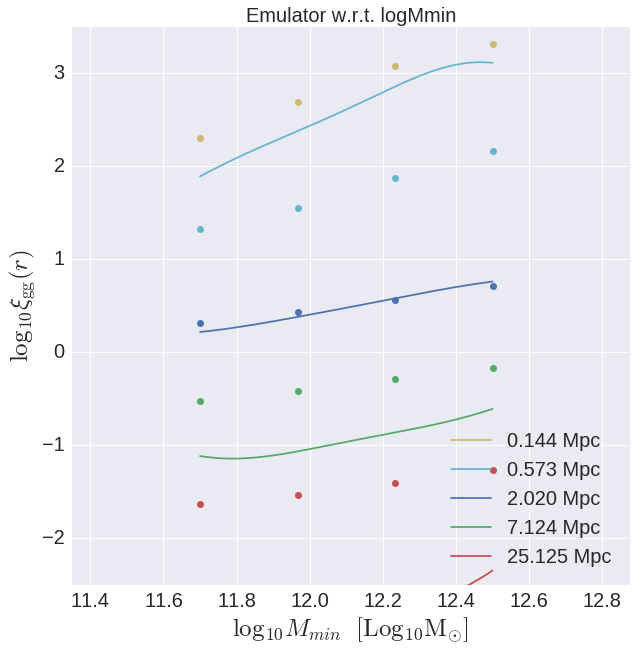

In [33]:
fig = plt.figure(figsize = (10, 10))

for label, (log_xi_pred, log_xi_err),px,err,c in zip(rpoints, outputs, plot_xi,plot_xi_err,colors):

    plt.plot(yp, (log_xi_pred),label='%.3f Mpc'%(10**label),color = c)
    
    plt.fill_between(yp,log_xi_pred+log_xi_err,
                     log_xi_pred-log_xi_err, color = c, alpha = 0.3)
    plt.errorbar(plot_yp, px,err, color =c,fmt = 'o')
    
plt.xlim(xmin = 0.97*BOUNDS[y_param][0], xmax = BOUNDS[y_param][1]*1.03)
if bias:
    plt.ylim(ymin=0, ymax=15)
else:
    plt.ylim(ymin = -2.5, ymax = 3.5)
plt.title("Emulator w.r.t. %s"%y_param, fontsize =20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$\log_{10}{M_{min}}}$  $\rm{[Log_{10} M_{\odot}]}$', fontsize=25)
#plt.xlabel(r'$\alpha$ ', fontsize=25)
if bias:
    plt.ylabel(r'$\xi_{\rm gg}/\xi_{\rm mm} }$', fontsize=25)
else:
    plt.ylabel(r'$\log_{10}{\xi_{\rm gg}(r) }$', fontsize=25)
plt.legend(loc='best', fontsize=20)  